<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span><ul class="toc-item"><li><span><a href="#TM-Heart" data-toc-modified-id="TM-Heart-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>TM Heart</a></span></li><li><span><a href="#Posterior-(may-be-combined-later)" data-toc-modified-id="Posterior-(may-be-combined-later)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Posterior (may be combined later)</a></span></li></ul></li></ul></div>

# Goal
To visualize results from 10 different methods of feature selection.


In [1]:
import pandas as pd
import numpy as np
from plotnine import *

In [2]:
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

## PPROM (Training)

In [3]:
# Training Data
std = pd.read_csv("./neuralnet_results/PPROM/run-log_PPROM_std-tag-loss_train.csv")
chi2_both = pd.read_csv("./neuralnet_results/PPROM/run-log_PPROM_chi2_both-tag-loss_train.csv")
ANOVA_F_value_both = pd.read_csv("./neuralnet_results/PPROM/run-log_PPROM_ANOVA_F-value_both-tag-loss_train.csv")
mutual_info_both = pd.read_csv("./neuralnet_results/PPROM/run-log_PPROM_mutual_info_both-tag-loss_train.csv")
mrmr_both_MID_k_0_5 = pd.read_csv("./neuralnet_results/PPROM/run-log_PPROM_mrmr_both_MID(k=0.5)-tag-loss_train.csv")
mrmr_both_MIQ_k_0_5 = pd.read_csv("./neuralnet_results/PPROM/run-log_PPROM_mrmr_both_MIQ(k=0.5)-tag-loss_train.csv")
mrmr_both_MID_k_1_0 = pd.read_csv("./neuralnet_results/PPROM/run-log_PPROM_mrmr_both_MID(k=1.0)-tag-loss_train.csv")
mrmr_both_MIQ_k_1_0 = pd.read_csv("./neuralnet_results/PPROM/run-log_PPROM_mrmr_both_MIQ(k=1.0)-tag-loss_train.csv")
recursive_elimination = pd.read_csv("./neuralnet_results/PPROM/run-log_PPROM_recursive_elimination_rf_100-tag-loss_train.csv")
diff_exp_genes = pd.read_csv("./neuralnet_results/PPROM/run-log_PPROM_differentially_expressed_genes-tag-loss_train.csv")

std["Value"] = smooth(list(std["Value"]), weight = 0.9)
chi2_both["Value"] = smooth(list(chi2_both["Value"]), weight = 0.9)
ANOVA_F_value_both["Value"] = smooth(list(ANOVA_F_value_both["Value"]), weight = 0.9)
mutual_info_both["Value"] = smooth(list(mutual_info_both["Value"]), weight = 0.9)
mrmr_both_MID_k_0_5["Value"] = smooth(list(mrmr_both_MID_k_0_5["Value"]), weight = 0.9)
mrmr_both_MIQ_k_0_5["Value"] = smooth(list(mrmr_both_MIQ_k_0_5["Value"]), weight = 0.9)
mrmr_both_MID_k_1_0["Value"] = smooth(list(mrmr_both_MID_k_1_0["Value"]), weight = 0.9)
mrmr_both_MIQ_k_1_0["Value"] = smooth(list(mrmr_both_MIQ_k_1_0["Value"]), weight = 0.9)
recursive_elimination["Value"] = smooth(list(recursive_elimination["Value"]), weight = 0.9)
diff_exp_genes["Value"] = smooth(list(diff_exp_genes["Value"]), weight = 0.9)


PPROM_train = pd.DataFrame()
PPROM_train["time"] = std.index
PPROM_train["std"] = std["Value"]
PPROM_train["chi2_both"] = chi2_both["Value"]
PPROM_train["ANOVA_F-value_both"] = ANOVA_F_value_both["Value"]
PPROM_train["mutual_info_both"] = mutual_info_both["Value"]
PPROM_train["mrmr_both_MID(k=0.5)"] = mrmr_both_MID_k_0_5["Value"]
PPROM_train["mrmr_both_MIQ(k=0.5)"] = mrmr_both_MIQ_k_0_5["Value"]
PPROM_train["mrmr_both_MID(k=1.0)"] = mrmr_both_MID_k_1_0["Value"]
PPROM_train["mrmr_both_MIQ(k=1.0)"] = mrmr_both_MIQ_k_1_0["Value"]
PPROM_train["recursive_elimination_rf_100"] = recursive_elimination["Value"]
PPROM_train["differentially_expressed_genes"] = diff_exp_genes["Value"]

PPROM_train_melt = PPROM_train.melt(id_vars = ["time"], var_name = "Legend")
PPROM_train_melt.head()

,time,Legend,value
0,0,std,0.647204
1,1,std,0.639005
2,2,std,0.639813
3,3,std,0.639243
4,4,std,0.641576


/Users/hojaelee/miniconda3/envs/graph/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/hojaelee/miniconda3/envs/graph/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ./neuralnet_results/PPROM_train.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


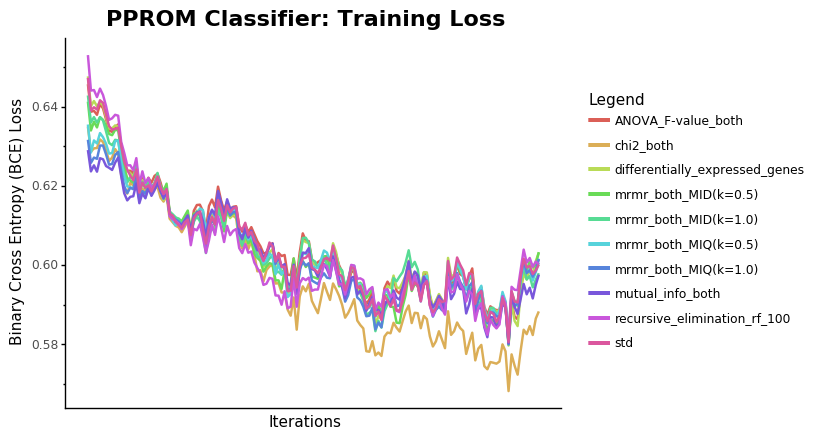

<ggplot: (7543781005)>

In [4]:
p = ggplot(PPROM_train_melt, aes(x = "time", y = "value", color = "Legend")) + \
    geom_line(size = 1) + \
    theme_classic() + \
    labs(title = "PPROM Classifier: Training Loss", x = "Iterations", y = "Binary Cross Entropy (BCE) Loss") + \
    theme(legend_position = "right", plot_title = element_text(size = 16, weight = "bold"), axis_text_x = element_blank(), axis_ticks_major_x = element_blank(), axis_ticks_minor_x = element_blank())
p.save("./neuralnet_results/PPROM_train.png", dpi = 600)
p

## PPROM (Validation)

In [5]:
# Training Data
std = pd.read_csv("./neuralnet_results/PPROM/run-log_PPROM_std-tag-loss_valid.csv")
chi2_both = pd.read_csv("./neuralnet_results/PPROM/run-log_PPROM_chi2_both-tag-loss_valid.csv")
ANOVA_F_value_both = pd.read_csv("./neuralnet_results/PPROM/run-log_PPROM_ANOVA_F-value_both-tag-loss_valid.csv")
mutual_info_both = pd.read_csv("./neuralnet_results/PPROM/run-log_PPROM_mutual_info_both-tag-loss_valid.csv")
mrmr_both_MID_k_0_5 = pd.read_csv("./neuralnet_results/PPROM/run-log_PPROM_mrmr_both_MID(k=0.5)-tag-loss_valid.csv")
mrmr_both_MIQ_k_0_5 = pd.read_csv("./neuralnet_results/PPROM/run-log_PPROM_mrmr_both_MIQ(k=0.5)-tag-loss_valid.csv")
mrmr_both_MID_k_1_0 = pd.read_csv("./neuralnet_results/PPROM/run-log_PPROM_mrmr_both_MID(k=1.0)-tag-loss_valid.csv")
mrmr_both_MIQ_k_1_0 = pd.read_csv("./neuralnet_results/PPROM/run-log_PPROM_mrmr_both_MIQ(k=1.0)-tag-loss_valid.csv")
recursive_elimination = pd.read_csv("./neuralnet_results/PPROM/run-log_PPROM_recursive_elimination_rf_100-tag-loss_valid.csv")
diff_exp_genes = pd.read_csv("./neuralnet_results/PPROM/run-log_PPROM_differentially_expressed_genes-tag-loss_valid.csv")

std["Value"] = smooth(list(std["Value"]), weight = 0)
chi2_both["Value"] = smooth(list(chi2_both["Value"]), weight = 0)
ANOVA_F_value_both["Value"] = smooth(list(ANOVA_F_value_both["Value"]), weight = 0)
mutual_info_both["Value"] = smooth(list(mutual_info_both["Value"]), weight = 0)
mrmr_both_MID_k_0_5["Value"] = smooth(list(mrmr_both_MID_k_0_5["Value"]), weight = 0)
mrmr_both_MIQ_k_0_5["Value"] = smooth(list(mrmr_both_MIQ_k_0_5["Value"]), weight = 0)
mrmr_both_MID_k_1_0["Value"] = smooth(list(mrmr_both_MID_k_1_0["Value"]), weight = 0)
mrmr_both_MIQ_k_1_0["Value"] = smooth(list(mrmr_both_MIQ_k_1_0["Value"]), weight = 0)
recursive_elimination["Value"] = smooth(list(recursive_elimination["Value"]), weight = 0)
diff_exp_genes["Value"] = smooth(list(diff_exp_genes["Value"]), weight = 0)

PPROM_valid = pd.DataFrame()
PPROM_valid["time"] = std.index
PPROM_valid["std"] = std["Value"]
PPROM_valid["chi2_both"] = chi2_both["Value"]
PPROM_valid["ANOVA_F-value_both"] = ANOVA_F_value_both["Value"]
PPROM_valid["mutual_info_both"] = mutual_info_both["Value"]
PPROM_valid["mrmr_both_MID(k=0.5)"] = mrmr_both_MID_k_0_5["Value"]
PPROM_valid["mrmr_both_MIQ(k=0.5)"] = mrmr_both_MIQ_k_0_5["Value"]
PPROM_valid["mrmr_both_MID(k=1.0)"] = mrmr_both_MID_k_1_0["Value"]
PPROM_valid["mrmr_both_MIQ(k=1.0)"] = mrmr_both_MIQ_k_1_0["Value"]
PPROM_valid["recursive_elimination_rf_100"] = recursive_elimination["Value"]
PPROM_valid["differentially_expressed_genes"] = diff_exp_genes["Value"]

PPROM_valid_melt = PPROM_valid.melt(id_vars = ["time"], var_name = "Legend")
PPROM_valid_melt.head()

,time,Legend,value
0,0,std,0.568488
1,1,std,0.576269
2,2,std,0.585150
3,3,std,0.595449
4,4,std,0.591555


/Users/hojaelee/miniconda3/envs/graph/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/hojaelee/miniconda3/envs/graph/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ./neuralnet_results/PPROM_valid.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


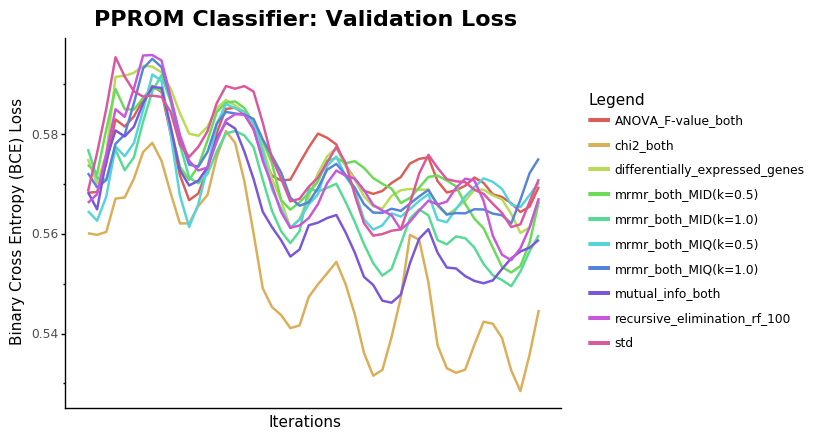

<ggplot: (-9223372029310925396)>

In [6]:
p = ggplot(PPROM_valid_melt, aes(x = "time", y = "value", color = "Legend")) + \
    geom_line(size = 1) + \
    theme_classic() + \
    labs(title = "PPROM Classifier: Validation Loss", x = "Iterations", y = "Binary Cross Entropy (BCE) Loss") + \
    theme(legend_position = "right", plot_title = element_text(size = 16, weight = "bold"), axis_text_x = element_blank(), axis_ticks_major_x = element_blank(), axis_ticks_minor_x = element_blank())
p.save("./neuralnet_results/PPROM_valid.png", dpi = 600)
p

## sPTD (Training)

In [7]:
# Training Data
std = pd.read_csv("./neuralnet_results/sPTD/run-log_sPTD_std-tag-loss_train.csv")
chi2_both = pd.read_csv("./neuralnet_results/sPTD/run-log_sPTD_chi2_both-tag-loss_train.csv")
ANOVA_F_value_both = pd.read_csv("./neuralnet_results/sPTD/run-log_sPTD_ANOVA_F-value_both-tag-loss_train.csv")
mutual_info_both = pd.read_csv("./neuralnet_results/sPTD/run-log_sPTD_mutual_info_both-tag-loss_train.csv")
mrmr_both_MID_k_0_5 = pd.read_csv("./neuralnet_results/sPTD/run-log_sPTD_mrmr_both_MID(k=0.5)-tag-loss_train.csv")
mrmr_both_MIQ_k_0_5 = pd.read_csv("./neuralnet_results/sPTD/run-log_sPTD_mrmr_both_MIQ(k=0.5)-tag-loss_train.csv")
mrmr_both_MID_k_1_0 = pd.read_csv("./neuralnet_results/sPTD/run-log_sPTD_mrmr_both_MID(k=1.0)-tag-loss_train.csv")
mrmr_both_MIQ_k_1_0 = pd.read_csv("./neuralnet_results/sPTD/run-log_sPTD_mrmr_both_MIQ(k=1.0)-tag-loss_train.csv")
recursive_elimination = pd.read_csv("./neuralnet_results/sPTD/run-log_sPTD_recursive_elimination_rf_100-tag-loss_train.csv")
diff_exp_genes = pd.read_csv("./neuralnet_results/sPTD/run-log_sPTD_differentially_expressed_genes-tag-loss_train.csv")

std["Value"] = smooth(list(std["Value"]), weight = 0.9)
chi2_both["Value"] = smooth(list(chi2_both["Value"]), weight = 0.9)
ANOVA_F_value_both["Value"] = smooth(list(ANOVA_F_value_both["Value"]), weight = 0.9)
mutual_info_both["Value"] = smooth(list(mutual_info_both["Value"]), weight = 0.9)
mrmr_both_MID_k_0_5["Value"] = smooth(list(mrmr_both_MID_k_0_5["Value"]), weight = 0.9)
mrmr_both_MIQ_k_0_5["Value"] = smooth(list(mrmr_both_MIQ_k_0_5["Value"]), weight = 0.9)
mrmr_both_MID_k_1_0["Value"] = smooth(list(mrmr_both_MID_k_1_0["Value"]), weight = 0.9)
mrmr_both_MIQ_k_1_0["Value"] = smooth(list(mrmr_both_MIQ_k_1_0["Value"]), weight = 0.9)
recursive_elimination["Value"] = smooth(list(recursive_elimination["Value"]), weight = 0.9)
diff_exp_genes["Value"] = smooth(list(diff_exp_genes["Value"]), weight = 0.9)


sPTD_train = pd.DataFrame()
sPTD_train["time"] = std.index
sPTD_train["std"] = std["Value"]
sPTD_train["chi2_both"] = chi2_both["Value"]
sPTD_train["ANOVA_F-value_both"] = ANOVA_F_value_both["Value"]
sPTD_train["mutual_info_both"] = mutual_info_both["Value"]
sPTD_train["mrmr_both_MID(k=0.5)"] = mrmr_both_MID_k_0_5["Value"]
sPTD_train["mrmr_both_MIQ(k=0.5)"] = mrmr_both_MIQ_k_0_5["Value"]
sPTD_train["mrmr_both_MID(k=1.0)"] = mrmr_both_MID_k_1_0["Value"]
sPTD_train["mrmr_both_MIQ(k=1.0)"] = mrmr_both_MIQ_k_1_0["Value"]
sPTD_train["recursive_elimination_rf_100"] = recursive_elimination["Value"]
sPTD_train["differentially_expressed_genes"] = diff_exp_genes["Value"]

sPTD_train_melt = sPTD_train.melt(id_vars = ["time"], var_name = "Legend")
sPTD_train_melt.head()

,time,Legend,value
0,0,std,0.576901
1,1,std,0.573055
2,2,std,0.572977
3,3,std,0.566120
4,4,std,0.569195


/Users/hojaelee/miniconda3/envs/graph/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/hojaelee/miniconda3/envs/graph/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ./neuralnet_results/sPTD_train.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


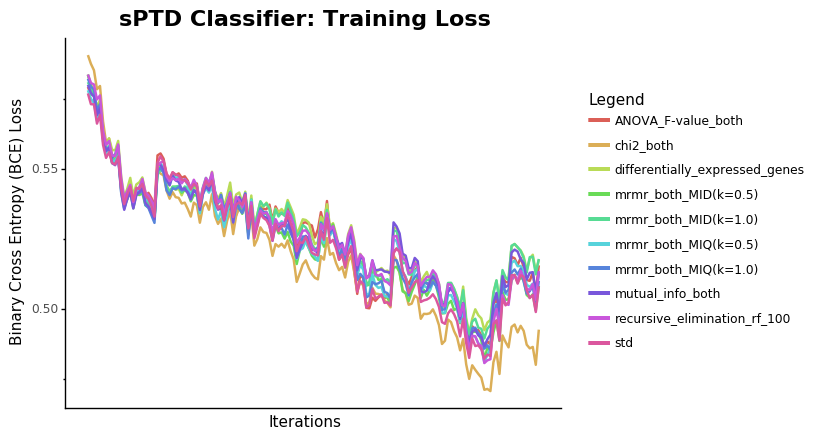

<ggplot: (7552104056)>

In [8]:
p = ggplot(sPTD_train_melt, aes(x = "time", y = "value", color = "Legend")) + \
    geom_line(size = 1) + \
    theme_classic() + \
    labs(title = "sPTD Classifier: Training Loss", x = "Iterations", y = "Binary Cross Entropy (BCE) Loss") + \
    theme(legend_position = "right", plot_title = element_text(size = 16, weight = "bold"), axis_text_x = element_blank(), axis_ticks_major_x = element_blank(), axis_ticks_minor_x = element_blank())
p.save("./neuralnet_results/sPTD_train.png", dpi = 600)
p

## sPTD (Validation)

In [9]:
# Training Data
std = pd.read_csv("./neuralnet_results/sPTD/run-log_sPTD_std-tag-loss_valid.csv")
chi2_both = pd.read_csv("./neuralnet_results/sPTD/run-log_sPTD_chi2_both-tag-loss_valid.csv")
ANOVA_F_value_both = pd.read_csv("./neuralnet_results/sPTD/run-log_sPTD_ANOVA_F-value_both-tag-loss_valid.csv")
mutual_info_both = pd.read_csv("./neuralnet_results/sPTD/run-log_sPTD_mutual_info_both-tag-loss_valid.csv")
mrmr_both_MID_k_0_5 = pd.read_csv("./neuralnet_results/sPTD/run-log_sPTD_mrmr_both_MID(k=0.5)-tag-loss_valid.csv")
mrmr_both_MIQ_k_0_5 = pd.read_csv("./neuralnet_results/sPTD/run-log_sPTD_mrmr_both_MIQ(k=0.5)-tag-loss_valid.csv")
mrmr_both_MID_k_1_0 = pd.read_csv("./neuralnet_results/sPTD/run-log_sPTD_mrmr_both_MID(k=1.0)-tag-loss_valid.csv")
mrmr_both_MIQ_k_1_0 = pd.read_csv("./neuralnet_results/sPTD/run-log_sPTD_mrmr_both_MIQ(k=1.0)-tag-loss_valid.csv")
recursive_elimination = pd.read_csv("./neuralnet_results/sPTD/run-log_sPTD_recursive_elimination_rf_100-tag-loss_valid.csv")
diff_exp_genes = pd.read_csv("./neuralnet_results/sPTD/run-log_sPTD_differentially_expressed_genes-tag-loss_valid.csv")

std["Value"] = smooth(list(std["Value"]), weight = 0)
chi2_both["Value"] = smooth(list(chi2_both["Value"]), weight = 0)
ANOVA_F_value_both["Value"] = smooth(list(ANOVA_F_value_both["Value"]), weight = 0)
mutual_info_both["Value"] = smooth(list(mutual_info_both["Value"]), weight = 0)
mrmr_both_MID_k_0_5["Value"] = smooth(list(mrmr_both_MID_k_0_5["Value"]), weight = 0)
mrmr_both_MIQ_k_0_5["Value"] = smooth(list(mrmr_both_MIQ_k_0_5["Value"]), weight = 0)
mrmr_both_MID_k_1_0["Value"] = smooth(list(mrmr_both_MID_k_1_0["Value"]), weight = 0)
mrmr_both_MIQ_k_1_0["Value"] = smooth(list(mrmr_both_MIQ_k_1_0["Value"]), weight = 0)
recursive_elimination["Value"] = smooth(list(recursive_elimination["Value"]), weight = 0)
diff_exp_genes["Value"] = smooth(list(diff_exp_genes["Value"]), weight = 0)


sPTD_valid = pd.DataFrame()
sPTD_valid["time"] = std.index
sPTD_valid["std"] = std["Value"]
sPTD_valid["chi2_both"] = chi2_both["Value"]
sPTD_valid["ANOVA_F-value_both"] = ANOVA_F_value_both["Value"]
sPTD_valid["mutual_info_both"] = mutual_info_both["Value"]
sPTD_valid["mrmr_both_MID(k=0.5)"] = mrmr_both_MID_k_0_5["Value"]
sPTD_valid["mrmr_both_MIQ(k=0.5)"] = mrmr_both_MIQ_k_0_5["Value"]
sPTD_valid["mrmr_both_MID(k=1.0)"] = mrmr_both_MID_k_1_0["Value"]
sPTD_valid["mrmr_both_MIQ(k=1.0)"] = mrmr_both_MIQ_k_1_0["Value"]
sPTD_valid["recursive_elimination_rf_100"] = recursive_elimination["Value"]
sPTD_valid["differentially_expressed_genes"] = diff_exp_genes["Value"]

sPTD_valid_melt = sPTD_valid.melt(id_vars = ["time"], var_name = "Legend")
sPTD_valid_melt.head()

,time,Legend,value
0,0,std,0.460439
1,1,std,0.436339
2,2,std,0.422600
3,3,std,0.416834
4,4,std,0.413881


/Users/hojaelee/miniconda3/envs/graph/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/hojaelee/miniconda3/envs/graph/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ./neuralnet_results/sPTD_valid.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


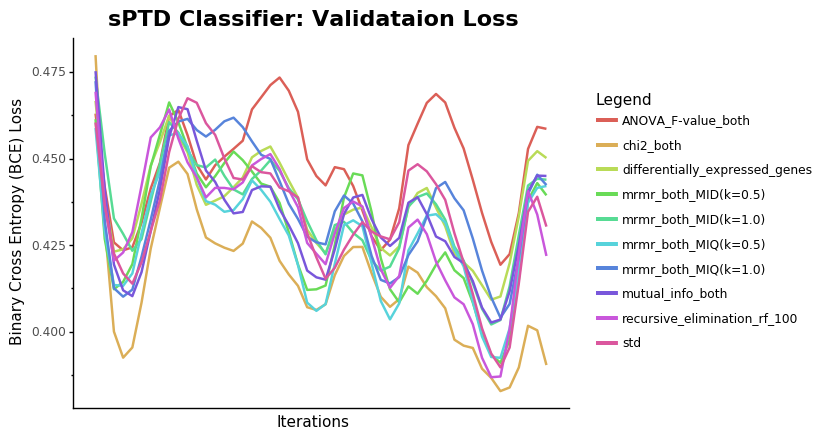

<ggplot: (-9223372029310939483)>

In [10]:
p = ggplot(sPTD_valid_melt, aes(x = "time", y = "value", color = "Legend")) + \
    geom_line(size = 1) + \
    theme_classic() + \
    labs(title = "sPTD Classifier: Validataion Loss", x = "Iterations", y = "Binary Cross Entropy (BCE) Loss") + \
    theme(legend_position = "right", plot_title = element_text(size = 16, weight = "bold"), axis_text_x = element_blank(), axis_ticks_major_x = element_blank(), axis_ticks_minor_x = element_blank())
p.save("./neuralnet_results/sPTD_valid.png", dpi = 600)
p